In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("Wine.csv")

In [3]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
# Clustering model in data sets

In [ ]:
# Kmean Algorithm

C:\Users\Veena.Kumar\Anaconda3\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


17592296.383508474
4543749.614531863
2370689.6867829696
1337029.4929415903
916379.1871539167
647326.0020260852
412303.82825080125
323223.2470542671
270954.9292415374
217887.3785603329


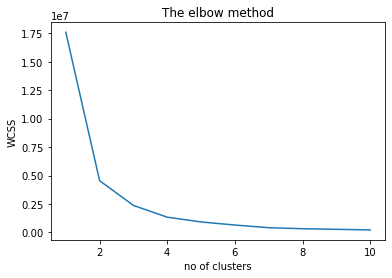

In [6]:
from sklearn.cluster import KMeans

wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters = i , init ="k-means++" ,random_state=42)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 3 , init ="k-means++" ,random_state=42)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=42)

In [8]:
kmean_clusters = kmeans.labels_

In [11]:
output = data.copy()
output["kmeans-cluster"] = kmean_clusters
output.head(178)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans-cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


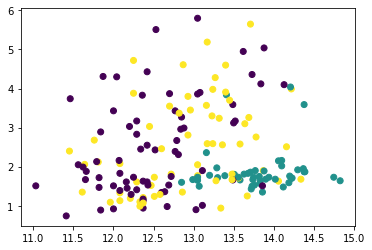

In [10]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=kmean_clusters)

In [ ]:
# heirarchcal clustering

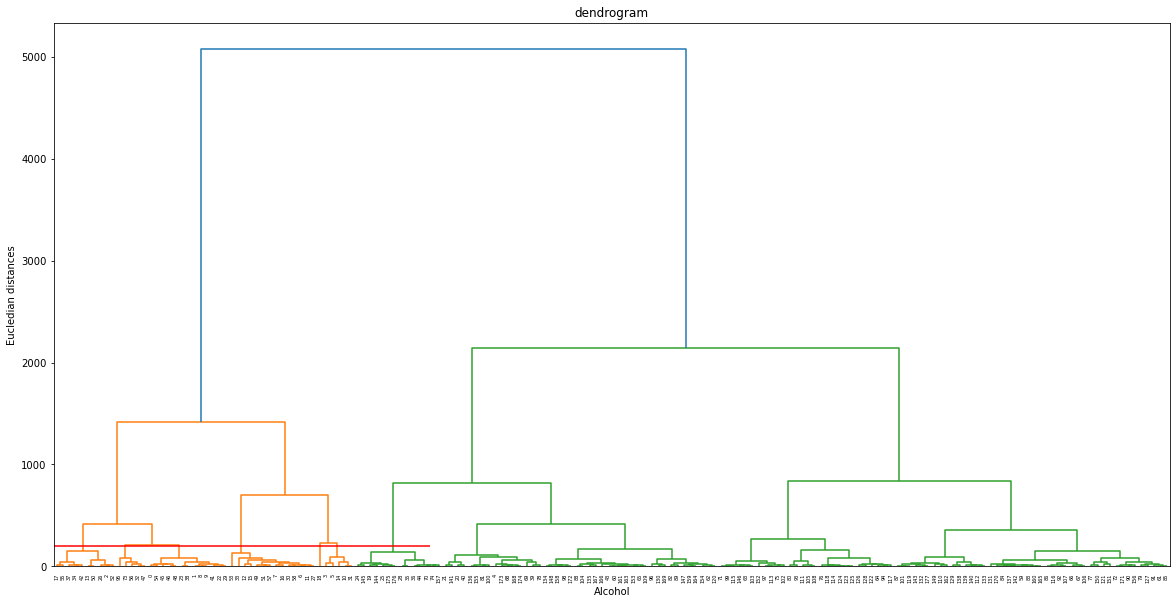

In [13]:
import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(data, method = "ward"))
plt.hlines(200,0,600,colors="red" , linestyles="solid") # for thehorizontal cut line 
plt.title("dendrogram")
plt.xlabel("Alcohol")
plt.ylabel("Eucledian distances")
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

model_hc = hc.fit(data)

HC_clusters = model_hc.labels_

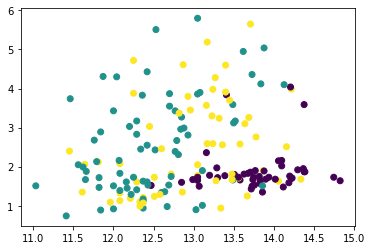

In [15]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=HC_clusters)